<a href="https://colab.research.google.com/github/Yairhubi/Data-analysis-project/blob/main/Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 יש לבחור את קובץ הנתונים מהמחשב שלך...


Saving data_model.csv to data_model (4).csv

🔍 מידע על הנתונים:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diameter(inch)  110 non-null    float64
 1   Thickness(mm)   110 non-null    float64
 2   Num_Layers      110 non-null    int64  
 3   Paper_Type      110 non-null    object 
 4   Burst_Strength  110 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.4+ KB
None

📝 הצצה לנתונים:
   Diameter(inch)  Thickness(mm)  Num_Layers Paper_Type  Burst_Strength
0             3.0            8.0          12     STAR45            1440
1             3.0            7.0          10     STAR45            1200
2             3.0            5.0           8     STAR45             960
3             3.0            4.5           7     STAR45             840
4             6.0            7.0          10     STAR45            1200



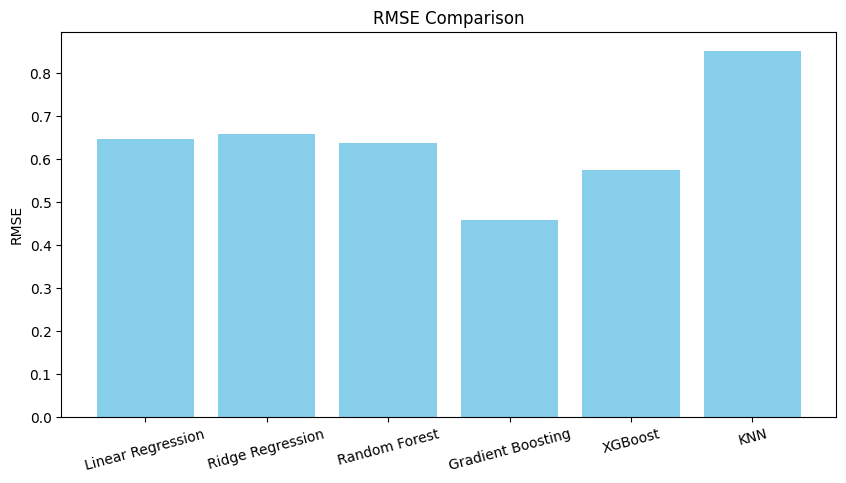

In [5]:
import pandas as pd  # עבודה עם נתונים בטבלאות
import numpy as np  # חישובים מתמטיים
import matplotlib.pyplot as plt  # יצירת גרפים
from google.colab import files
from sklearn.model_selection import train_test_split  # פיצול הנתונים לאימון ובדיקה
from sklearn.preprocessing import LabelEncoder, StandardScaler  # עיבוד נתונים
from sklearn.linear_model import LinearRegression, Ridge  # מודלי רגרסיה
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # מודלים מבוססי עצים
from xgboost import XGBRegressor  # מודל Boosting מתקדם
from sklearn.neighbors import KNeighborsRegressor  # מודל KNN לרגרסיה
from sklearn.metrics import mean_squared_error  # מדידת ביצועי המודלים

# 📌 שלב 1: העלאת הנתונים מהמחשב
print("📂 יש לבחור את קובץ הנתונים מהמחשב שלך...")
uploaded = files.upload()

# 📌 שלב 2: קריאת הנתונים מהקובץ
file_name = list(uploaded.keys())[0]  # קבלת שם הקובץ שהועלה
df = pd.read_csv(file_name)  # טעינת הנתונים לקובץ pandas

# 📌 הצגת מידע ראשוני על הנתונים
print("\n🔍 מידע על הנתונים:")
print(df.info())
print("\n📝 הצצה לנתונים:")
print(df.head())

#  המרת עמודת 'Paper_Type' לקטגורייאלי
if 'Paper_Type' in df.columns:
    label_encoder = LabelEncoder()
    df['Paper_Type'] = label_encoder.fit_transform(df['Paper_Type'])

# פיצול הנתונים למשתנים והגדרת משתנה מטרה
X = df.drop(columns=['Num_Layers'])  # מאפיינים
y = df['Num_Layers']  # משתנה מטרה

# נירמול הנתונים
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# פיצול הנתונים - 80% אימון, 20% בדיקה
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# בחירת מודלים
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

#    אימון המודלים וחישוב הביצועים
results = {}
print("\n *RMSE*")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f"{name}: RMSE = {rmse:.4f}")

#   הצגת ביצועי המודלים בגרף
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("RMSE")
plt.title("RMSE Comparison")
plt.xticks(rotation=15)
plt.show()